In [1]:
import os
import uproot
import numpy as np

import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
fname = os.path.expandvars("$LUSTRE/Charge/tuning/charge2D_and_unhit.root")
f  = uproot.open(fname)
f.classnames()

{'charge2D;1': 'TH2D', 'PUnhit;1': 'TGraph', 'hPunhitPar;1': 'TH1D'}

In [3]:
# read 2D histogram
Hq, mubins, qbins = f["charge2D"].to_numpy()
# unhit probability and parameters
mus, PUnhit = f["PUnhit"].values()
pars, _     = f["hPunhitPar"].to_numpy()

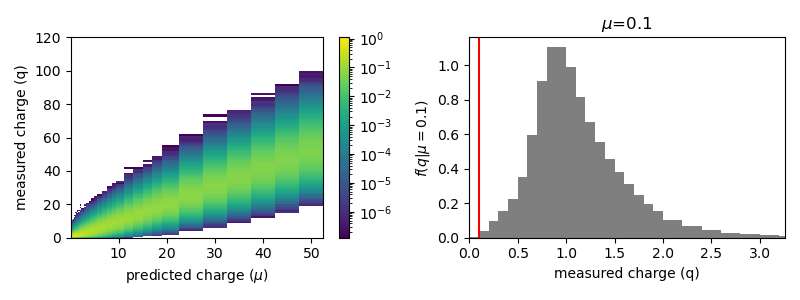

In [28]:
plt.figure(figsize=[8, 3])

# plot 2D
plt.subplot(121)
plt.pcolormesh(mubins, qbins, Hq.T, norm="log")
plt.xlabel(r"predicted charge ($\mu$)")
plt.ylabel("measured charge (q)")
plt.colorbar()

# plot projection
plt.subplot(122)
mu = 0.1
index = np.digitize(mu, mubins)-1
plt.title(rf"$\mu$={mu}")
plt.stairs( Hq[index], qbins, color="k", fill=True, alpha=0.5)
plt.axvline(mu, color="r")
plt.xlim([0, mu+np.sqrt(mu)*10])
plt.ylim([0, None])
plt.xlabel("measured charge (q)")
plt.ylabel(rf"$f(q|\mu={mu})$")

plt.tight_layout()

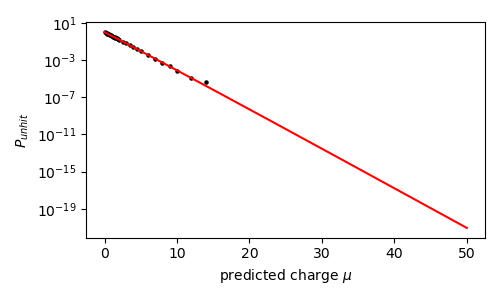

In [12]:
def PUnhit_func(x, a1, a2, a3):
    return (1. + a1*x + a2*x**2 + a3*x**3)*np.exp(-x)

plt.figure(figsize=[5, 3])

plt.scatter(mus, PUnhit, color="k", s=5)
x = np.linspace(0, np.max(mus), 1000)
plt.plot(x, PUnhit_func(x, *pars[:3]), color="r")

plt.xlabel(rf"predicted charge $\mu$")
plt.ylabel(r"$P_{unhit}$")

plt.yscale("log")
# plt.xlim([None, 20])
# plt.ylim([1e-11, None])
plt.tight_layout()